## DATA

In [58]:
Q <- read.csv("Class_23078_QMatrix__591509.csv")
X <- read.csv("Class_23078_XMatrix__591509.csv") |> as.matrix()
Q <- subset(Q, select = -item_ids) # removing item id's..the Q Matrix should only have 0s and 1s

In [59]:
X

X582647,X582645,X524437,X582648,X524440,X582643,X582646,X524421,X524438,X582649,X524439,X524419,X582644,X582650,X524418,X582651,X524436,X524420
1,0,0,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1
1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,1,1
1,0,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,1
1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1
1,0,0,1,NA,1,0,0,0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,1,1,1,0,1,0,1,0,1,1,1,0,1
1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1
1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1


In [60]:
Q

,Order.of.Operations............positive.reals,Order.of.Operations.All,Area.Rectangle
,<int>,<int>,<int>
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
5,0,0,1
6,1,0,0
7,1,0,0
8,0,1,0
9,0,1,0


## Model

In [61]:
library(nimble)

In this analysis we will use a DINA type combination function which means the student needs to possess all the skills that an item is assessing to get that item correct. The skills required by each item is specified by the Q-Matrix

In [62]:
# Logic to implement the min combination rule (similar to DINA Model) ========
indexed_min <- nimbleFunction(
  run = function(m = double(1), skills = double(1), Q = double(1)) {
    returnType(double())
    K <- length(m)
    result <- Inf
    for(k in 1:K) {
      if(Q[k] == 1) {
        result <- min(result, m[k] * skills[k])
      }
    }
    return(result)
  }
)

### Probability Model Defition

In [63]:
DiBello <- nimbleCode({
    
    # Prior Specificaiton # =====================================================
    
    for(j in 1:J){
        # Item Difficulty 
        D[j] ~ dnorm(mean=0,sd=1)

        # Item Pseudo guessing probability 
        pseudo_guess[j] ~ dbeta(1,1)
    }
    for(k in 1:K){
        # Influence of k-th skill on student correctly answering the item
        m_A[k] ~ dlnorm(mean=1,sd=1)
    }

    for(i in 1:N){
        for(k in 1:K){
            # lambda is the probability of i-th student mastering k-th skill
            lambda[i,k] ~ dbeta(1,1)
            skills[i,k] ~ dbern(lambda[i,k])
        }
    }
    # =================================================================
    for(i in 1:N){
        for(j in 1:J){
            
            # Effective Ability computation # ===========================
            eff_ability[i,j] <-  indexed_min(m_A[1:K], skills[i,1:K], Q[j, 1:K])

            # Item Response Probability Function Definition # ============
            Pr[i,j] <- ilogit(1.7*(eff_ability[i,j] + D[j]))
            pi[i,j] <- pseudo_guess[j] + (1 - pseudo_guess[j])*Pr[i,j]
            X[i,j] ~ dbern(pi[i,j])
        }
    }    
})

In [64]:
modelConstants <- list(
    N = dim(X)[1],
    J = dim(X)[2],
    K = dim(Q)[2]
)
data <- list(
    X = X,
    Q = Q
)
initial_values <- list()

# Initializing the model
M0 <- nimbleModel(
    code = DiBello, 
    data = data, 
    inits = initial_values, 
    constants = modelConstants, 
    name = "baseline model"
)

Defining model

Building model

Setting data and initial values

Running calculate on model
  [Note] Any error reports that follow may simply reflect missing values in model variables.

Checking model sizes and dimensions

  [Note] This model is not fully initialized. This is not an error.
         To see which variables are not initialized, use model$initializeInfo().
         For more information on model initialization, see help(modelInitialization).



In [65]:
# Compiling the model to C code 
cmodel <- compileNimble(M0)

Compiling
  [Note] This may take a minute.
  [Note] Use 'showCompilerOutput = TRUE' to see C++ compilation details.



In [66]:
 # N: No of stundets 
    # J: No of items 
    # K: No of skills
    modelConstants <- list(
        N = dim(X)[1],
        J = dim(X)[2],
        K = dim(Q)[2]
    )
    data <- list(
        X = X,
        Q = Q
    )
    initial_values <- list()

    # Initializing the model
    M0 <- nimbleModel(
        code = DiBello, 
        data = data, 
        inits = initial_values, 
        constants = modelConstants
    )

Defining model

Building model

Setting data and initial values

Running calculate on model
  [Note] Any error reports that follow may simply reflect missing values in model variables.

Checking model sizes and dimensions

  [Note] This model is not fully initialized. This is not an error.
         To see which variables are not initialized, use model$initializeInfo().
         For more information on model initialization, see help(modelInitialization).



In [68]:
model <- compileNimble(M0)

Compiling
  [Note] This may take a minute.
  [Note] Use 'showCompilerOutput = TRUE' to see C++ compilation details.



In [69]:
dataNodes <- M0$getNodeNames(dataOnly = TRUE)
    parentNodes <- M0$getParents(dataNodes, stochOnly = TRUE)  # `getParents` is new in nimble 0.11.0
    ## Ensure we have both data nodes and deterministic intermediates (e.g., lifted nodes)
    simNodes <- M0$getDependencies(parentNodes, self = FALSE)
    paras <- "lambda"

In [70]:
n.iter <- 10000
n.burnun <- 2000
n.chain <- 3 

In [71]:
mcmc_fit<- nimbleMCMC( model = model,
                        monitors = c(parentNodes, paras),
                        niter = n.iter, 
                        nburnin = n.burnun, 
                        nchains = n.chain, 
                        samplesAsCodaMCMC=TRUE)

Compiling
  [Note] This may take a minute.
  [Note] Use 'showCompilerOutput = TRUE' to see C++ compilation details.

running chain 1...



|-------------|-------------|-------------|-------------|
|-------------------------------------------------------|


running chain 2...



|-------------|-------------|-------------|-------------|
|-------------------------------------------------------|


running chain 3...



|-------------|-------------|-------------|-------------|
|-------------------------------------------------------|


In [72]:
library(coda)
library(MCMCvis)
library(ggplot2)
library(codatools)

In [73]:
res <-mcmc.list(mcmc_fit) # we need to transform the results from NIMBLE to dataframe format for further analysis 
mcmc_summ  <- MCMCsummary(object = res) # creates a summary of all the MCMC runs.
mcmc_summ

,mean,sd,2.5%,50%,97.5%,Rhat,n.eff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
D[1],0.05248276,1.0208925,-2.05240329,0.19036245,1.68213887,1.01,916
D[2],-0.74967214,0.4990041,-1.86668283,-0.68418803,0.05308695,1.00,1085
D[3],-0.60545918,0.5689526,-1.98458388,-0.51020846,0.22932072,1.00,1035
D[4],0.96937555,0.9869308,-1.16601811,1.07741102,2.67934497,1.00,2149
D[5],-1.71403669,0.5380801,-2.96241046,-1.65452954,-0.84571719,1.00,1752
D[6],-0.38922689,0.7419443,-2.00849853,-0.30188708,0.79517884,1.00,984
D[7],-0.10927808,0.4510472,-1.12991650,-0.04994144,0.61888082,1.00,1511
D[8],-0.55868280,0.6063983,-1.99062902,-0.46796778,0.34373222,1.02,820
D[9],-1.01876574,0.4541435,-2.09799027,-0.95182895,-0.33943447,1.00,1303


In [74]:
# Checking for convergence; if this returns an empty table that means the chains have converged. 
mcmc_summ[mcmc_summ[,"Rhat"] > 1.1,]

mean,sd,2.5%,50%,97.5%,Rhat,n.eff
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


Posterior Distribution: Item Difficulty 

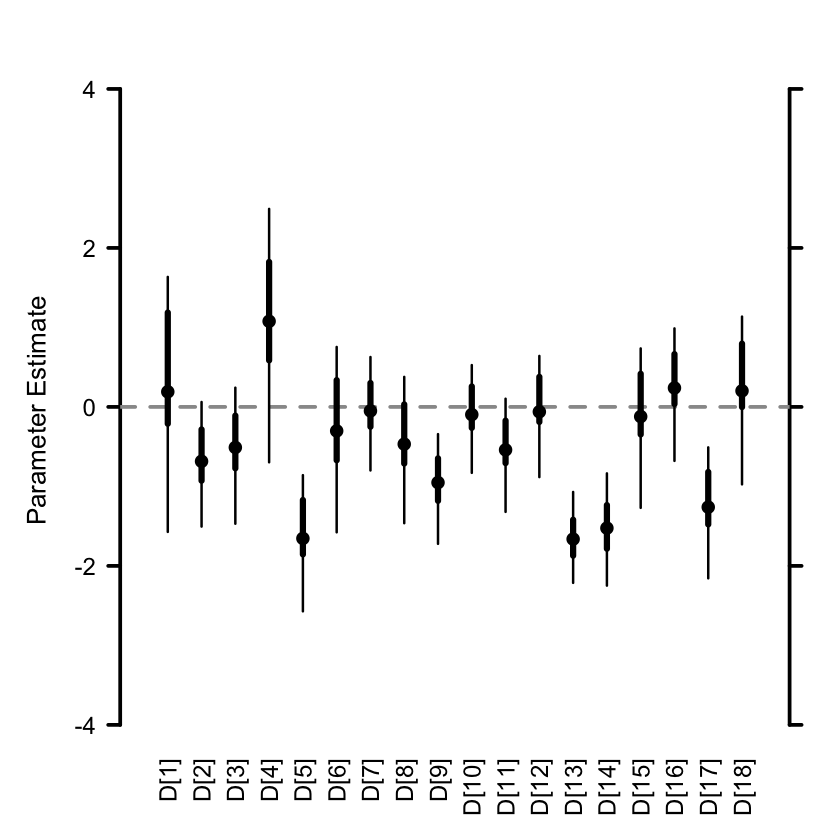

In [76]:
MCMCplot(object = mcmc_fit, params="D", horiz = FALSE, HPD=TRUE,ci =c(50,90))

Posterior Distribution: Pseudo-guess

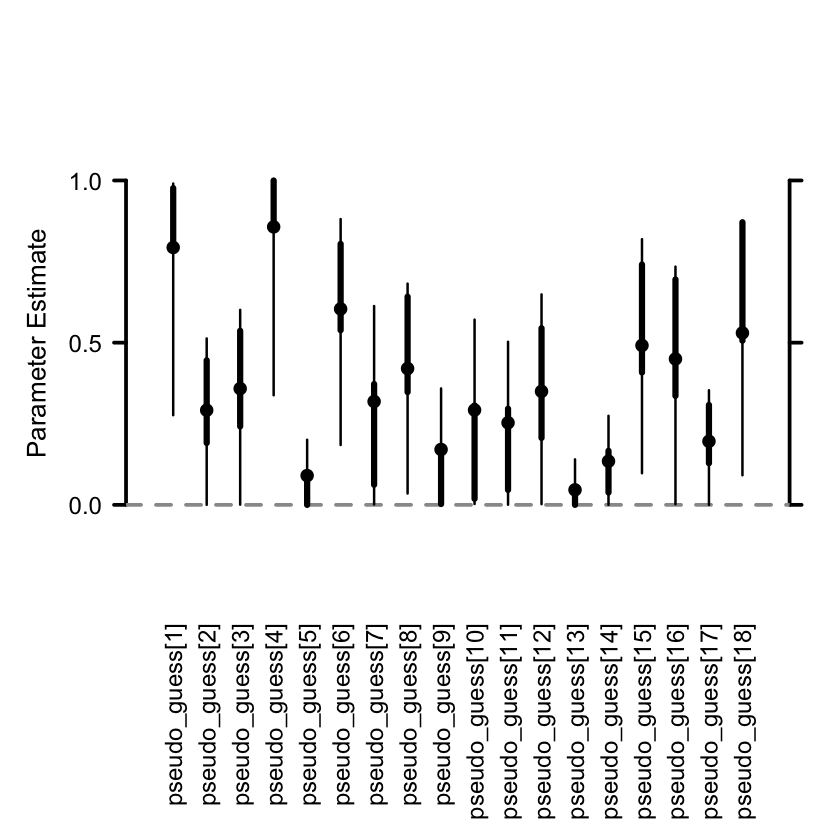

In [78]:
MCMCplot(object = mcmc_fit, params="pseudo_guess", horiz = FALSE, HPD=TRUE,ci =c(50,90))

In [80]:
# The MCMC summary only returns the mean value; but for skill profiles we are interested in the mode 
# smode is a function that we are defining to get the mode of a give binary vector 
smode <- function(x) {
   return(as.numeric(names(which.max(table(x)))))
}
skills <- coda_grep(mcmc_fit,"skills", return.matrix = TRUE)
abilities <- matrix(apply(skills,2,smode),nrow(X),ncol(Q))

Skill Profiles

In [81]:
abilities

0,0,1
0,1,0
0,1,0
1,1,0
0,0,1
1,0,0
1,1,0
0,0,0
0,0,0
1,1,1
0,1,0


## Posterior Predictive Simulation

In [87]:
X2 = X
X2[is.na(X2)] <- 0 # For posterior predictive simulation the observed data matrix should not have NAs
X_true <- apply(X2,1,sum) # score distribution of the observed item response matrix

In [82]:
# creating a smaller sample for posterior predictive simulation
res_matrix <- as.matrix(res)
nSamples <- nrow(res_matrix)
postNames <- colnames(res_matrix)
res_sub <- res_matrix[seq(from =1, to=24000,by=200),]

In [86]:
ppScoreDist <- matrix(0,nrow(res_sub),nrow(X))
ppDDist <- matrix(0,nrow(res_sub),ncol(X))
ppDrep <- matrix(0,nrow(res_sub),1)
ppDtheor <- matrix(0, nrow(res_sub),1)
set.seed(100)
for(i in 1:nrow(res_sub)){
   X_pred <- matrix(0,nrow(X),ncol(X))
   
   values(cmodel, postNames) <- res_sub[i,]
   cmodel$simulate(simNodes, includeData = TRUE)
   
   X_pred <- cmodel[["X"]]
   pi <- cmodel[["pi"]]
   D_rep <- mean((X_pred - pi)^2/(pi*(1-pi)))
   D_theoretical <- mean((X2 - pi)^2/(pi*(1-pi)))

   ppScoreDist[i,] <- apply(X_pred,1,sum)
   ppDDist[i,] <- apply(X_pred,2,mean)
   ppDrep[i,] <- D_rep
   ppDtheor[i,] <- D_theoretical
}
     

In [88]:
library("bayesplot");

This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



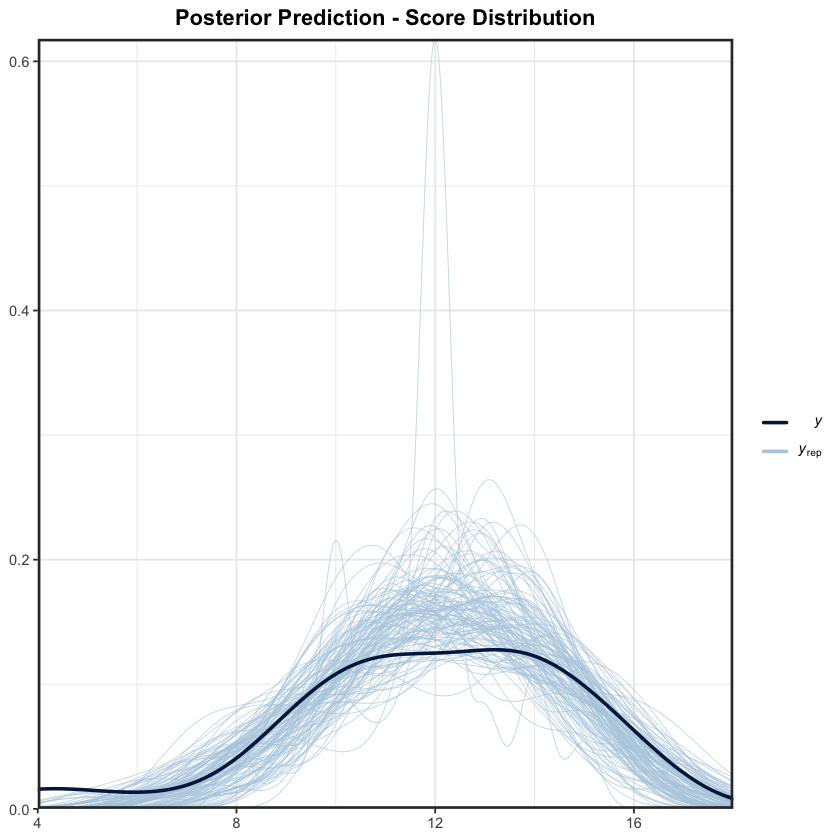

In [90]:
ppc_dens_overlay(X_true, ppScoreDist)+ ggtitle("Posterior Prediction - Score Distribution")+ theme_bw()+
        theme(plot.title = element_text(face = "bold", hjust=0.5),
        axis.text.x = element_text(angle=0),
        panel.border = element_rect(size=1.5)) 

In [91]:
post_score_mean = data.frame(value = apply(ppScoreDist, 2, mean))
score_mean = data.frame(value = X_true)

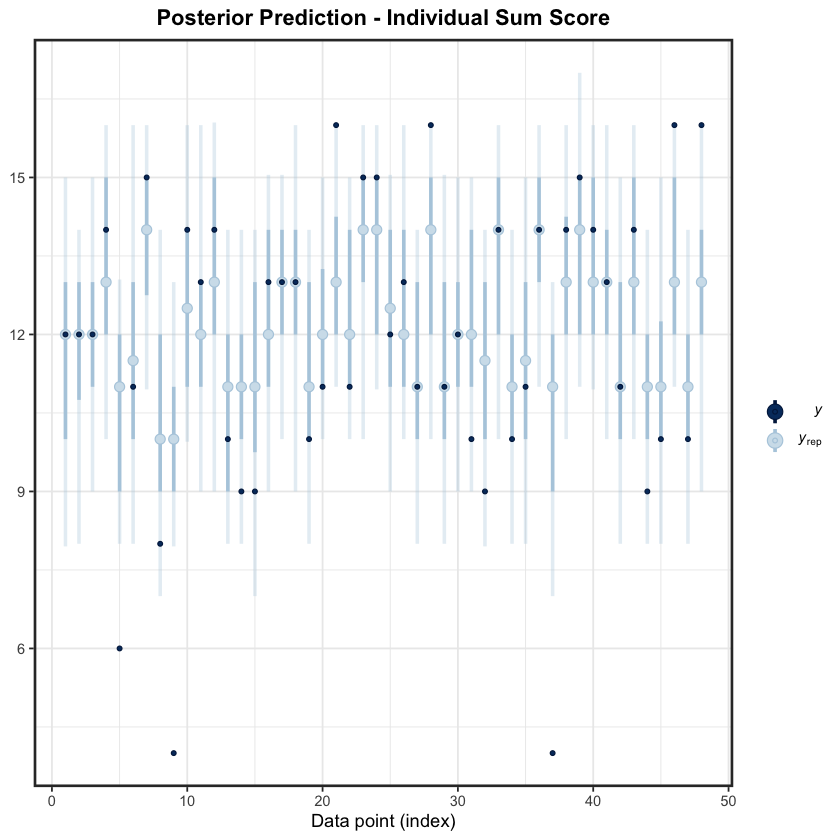

In [92]:
ppc_intervals(X_true, ppScoreDist)+ggtitle("Posterior Prediction - Individual Sum Score")+ theme_bw()+
        theme(plot.title = element_text(face = "bold", hjust=0.5),
        axis.text.x = element_text(angle=0),
        panel.border = element_rect(size=1.5))

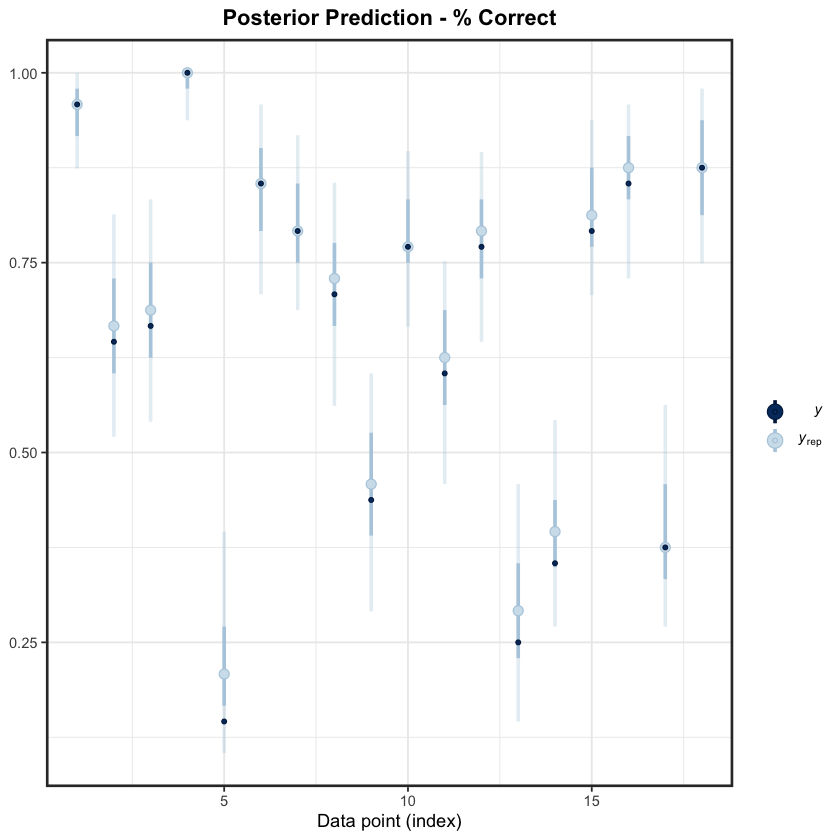

In [93]:
X_diff <- apply(X2,2,mean)
ppc_intervals(X_diff,  ppDDist)+ggtitle("Posterior Prediction - % Correct")+ theme_bw()+
        theme(plot.title = element_text(face = "bold", hjust=0.5),
        axis.text.x = element_text(angle=0),
        panel.border = element_rect(size=1.5))